In [383]:
import pandas as pd

# Tratamiento de datos

En esta primera parte se empieza con la limpieza y tratamiento de los datos, esto es importante ya que esto ayudará a que el modelo pueda entrenar de la mejor forma y pueda alcanzar una mayor precisión 

En esta primer parte se lee el dataset que se usará por el resto del código y se guarda en la variable dataset

In [232]:
dataset = pd.read_excel('BASE DE DATOS.xlsx')
dataset

,Identifier (RIC),Company Name,ESG Score\n(FY0),NAICS Sector Name,CODIGO,TRBC Activity Name,Total Energy Use To EVIC USD in million\n(FY-1),Scope 1 Estimated Totals To Revenues USD in Million\n(FY0),Water Use To EVIC USD in million\n(FY0),Water Use To Revenues USD in million\n(FY0),...,Median Salary Gap\n(FY0),Policy Board Independence\n(FY0),Policy Board Diversity\n(FY0),Policy Board Experience\n(FY0),Energy Use Total\n(FY0),Total Renewable Energy\n(FY0),Market Cap,Renewable Energy Use Ratio\n(FY0),Green Capex\n(FY0),Deforestation Controversies Count\n(FY0)
0,601360.SS,360 Security Technology Inc,35.338294,"Professional, Scientific, and Technical Services",54,Online Services (NEC),NaN,3.387115,NaN,NaN,...,NaN,1.0,0.0,1.0,NaN,NaN,7.549580e+09,NaN,0.0,NaN
1,III.L,3i Group PLC,71.365640,Finance and Insurance,52,Investment Management & Fund Operators (NEC),0.256986,0.030572,0.261598,0.941106,...,NaN,0.0,1.0,1.0,5113.08,2269.09,3.771649e+10,0.443781,0.0,NaN
2,MMM.N,3M Co,90.715988,Manufacturing,31,Consumer Goods Conglomerates,252.974117,70.700283,452.901300,1089.719244,...,198.00,1.0,1.0,1.0,29484000.00,5796000.00,5.654799e+10,NaN,0.0,NaN
3,FOUR.L,4imprint Group PLC,56.751867,"Professional, Scientific, and Technical Services",54,Direct Marketing,23.602290,0.483210,NaN,NaN,...,NaN,0.0,1.0,1.0,25800.90,NaN,2.086432e+09,NaN,0.0,NaN
4,BAG.L,A G Barr PLC,42.648572,Manufacturing,31,Carbonated Soft Drinks,220.403038,11.082928,NaN,NaN,...,NaN,0.0,1.0,1.0,160770.00,NaN,8.494973e+08,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,0763.HK,ZTE Corp,89.554445,Information,51,Communications & Networking (NEC),125.526738,2.416762,216.917863,304.450627,...,NaN,1.0,1.0,1.0,7256580.00,9680.85,1.717045e+10,NaN,0.0,NaN
8942,ZTO.N,ZTO Express (Cayman) Inc,60.136578,Transportation and Warehousing,48,Courier Services,825.543888,258.197022,175.613459,820.988930,...,NaN,1.0,1.0,1.0,19952600.00,75600.00,1.709282e+10,NaN,0.0,NaN
8943,2057.HK,ZTO Express (Cayman) Inc,60.136578,Transportation and Warehousing,48,Courier Services,825.543888,258.197022,175.613459,820.988930,...,NaN,1.0,1.0,1.0,19952600.00,75600.00,1.709282e+10,NaN,0.0,NaN
8944,ZYDU.BO,Zydus Lifesciences Ltd,67.363008,Manufacturing,31,Generic Pharmaceuticals,354.781048,44.576014,236.999494,730.385171,...,NaN,0.0,1.0,1.0,1968830.00,502041.00,1.295149e+10,0.254995,0.0,NaN


In [233]:
dataset.shape

(8946, 27)

Se eliminan datos repetidos ya que solo perjudicaran al rendimiento del modelo

In [234]:
dataset = dataset.drop_duplicates()
dataset.shape

(7270, 27)

Se obtienen el porcentaje de datos no nullos que tiene cada columna y se filtra los que tienen menos datos no nulos, esto porque esos datos habría que elimarlos o si no tratarlos para rellenar los datos vacios.

In [235]:
def percentage_not_null(attr, dataframe):
    return dataframe[(dataframe[attr].notna())][attr].count() * 100 / dataframe.shape[0]

In [236]:
columns_with_null = []
for i in dataset.columns:
    if percentage_not_null(i, dataset) <= 70:
        columns_with_null.append((i, percentage_not_null(i, dataset)))
columns_with_null

[('Total Energy Use To EVIC USD in million\n(FY-1)',
  np.float64(62.393397524071524)),
 ('Water Use To EVIC USD in million\n(FY0)', np.float64(55.557083906464925)),
 ('Water Use To Revenues USD in million\n(FY0)',
  np.float64(59.33975240715268)),
 ('Total Energy Use To Revenues USD in million\n(FY0)',
  np.float64(66.46492434662999)),
 ('Salary Gap\n(FY0)', np.float64(55.667125171939475)),
 ('Median Salary Gap\n(FY0)', np.float64(18.541953232462173)),
 ('Energy Use Total\n(FY0)', np.float64(67.01513067400275)),
 ('Total Renewable Energy\n(FY0)', np.float64(45.30949105914718)),
 ('Renewable Energy Use Ratio\n(FY0)', np.float64(27.66162310866575)),
 ('Deforestation Controversies Count\n(FY0)',
  np.float64(0.013755158184319119))]

In [237]:
dataset = dataset.drop(columns=['Deforestation Controversies Count\n(FY0)', 'Median Salary Gap\n(FY0)', 'Renewable Energy Use Ratio\n(FY0)'])
dataset

,Identifier (RIC),Company Name,ESG Score\n(FY0),NAICS Sector Name,CODIGO,TRBC Activity Name,Total Energy Use To EVIC USD in million\n(FY-1),Scope 1 Estimated Totals To Revenues USD in Million\n(FY0),Water Use To EVIC USD in million\n(FY0),Water Use To Revenues USD in million\n(FY0),...,Policy Diversity and Opportunity\n(FY0),Salary Gap\n(FY0),Net Employment Creation\n(FY0),Policy Board Independence\n(FY0),Policy Board Diversity\n(FY0),Policy Board Experience\n(FY0),Energy Use Total\n(FY0),Total Renewable Energy\n(FY0),Market Cap,Green Capex\n(FY0)
0,601360.SS,360 Security Technology Inc,35.338294,"Professional, Scientific, and Technical Services",54,Online Services (NEC),NaN,3.387115,NaN,NaN,...,1.0,13.936185,-12.335994,1.0,0.0,1.0,NaN,NaN,7.549580e+09,0.0
1,III.L,3i Group PLC,71.365640,Finance and Insurance,52,Investment Management & Fund Operators (NEC),0.256986,0.030572,0.261598,0.941106,...,1.0,21.222907,2.991453,0.0,1.0,1.0,5113.08,2269.09,3.771649e+10,0.0
2,MMM.N,3M Co,90.715988,Manufacturing,31,Consumer Goods Conglomerates,252.974117,70.700283,452.901300,1089.719244,...,1.0,NaN,-3.157895,1.0,1.0,1.0,29484000.00,5796000.00,5.654799e+10,0.0
3,FOUR.L,4imprint Group PLC,56.751867,"Professional, Scientific, and Technical Services",54,Direct Marketing,23.602290,0.483210,NaN,NaN,...,1.0,16.059680,17.641997,0.0,1.0,1.0,25800.90,NaN,2.086432e+09,0.0
4,BAG.L,A G Barr PLC,42.648572,Manufacturing,31,Carbonated Soft Drinks,220.403038,11.082928,NaN,NaN,...,1.0,29.533849,3.016760,0.0,1.0,1.0,160770.00,NaN,8.494973e+08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,1157.HK,Zoomlion Heavy Industry Science and Technology...,52.483259,Manufacturing,31,Construction Machinery,123.215427,8.430300,255.651459,474.022531,...,1.0,23.356040,-2.892149,1.0,1.0,1.0,1467240.00,NaN,8.520533e+09,0.0
8940,ZOREN.IS,Zorlu Enerji Elektrik Uretim AS,72.941179,Utilities,22,Electric Utilities (NEC),1818.267073,1236.991233,15619.980789,59430.663377,...,1.0,NaN,11.462284,1.0,0.0,0.0,5658540.00,950026.00,8.428824e+08,0.0
8943,2057.HK,ZTO Express (Cayman) Inc,60.136578,Transportation and Warehousing,48,Courier Services,825.543888,258.197022,175.613459,820.988930,...,1.0,NaN,4.286612,1.0,1.0,1.0,19952600.00,75600.00,1.709282e+10,0.0
8944,ZYDU.BO,Zydus Lifesciences Ltd,67.363008,Manufacturing,31,Generic Pharmaceuticals,354.781048,44.576014,236.999494,730.385171,...,1.0,218.253954,-3.019837,0.0,1.0,1.0,1968830.00,502041.00,1.295149e+10,0.0


In [238]:
columns_categorical_values = dataset.drop(columns=dataset.describe().columns).columns
columns_categorical_values

Index(['Identifier (RIC)', 'Company Name', 'NAICS Sector Name',
       'TRBC Activity Name'],
      dtype='object')

In [239]:
dataset = dataset.drop(columns=columns_categorical_values)
dataset

,ESG Score\n(FY0),CODIGO,Total Energy Use To EVIC USD in million\n(FY-1),Scope 1 Estimated Totals To Revenues USD in Million\n(FY0),Water Use To EVIC USD in million\n(FY0),Water Use To Revenues USD in million\n(FY0),Total Energy Use To Revenues USD in million\n(FY0),Scope 1 Estimated Total To EVIC USD in Millions\n(FY0),Health & Safety Policy\n(FY0),Policy Supply Chain Health & Safety\n(FY0),Policy Diversity and Opportunity\n(FY0),Salary Gap\n(FY0),Net Employment Creation\n(FY0),Policy Board Independence\n(FY0),Policy Board Diversity\n(FY0),Policy Board Experience\n(FY0),Energy Use Total\n(FY0),Total Renewable Energy\n(FY0),Market Cap,Green Capex\n(FY0)
0,35.338294,54,NaN,3.387115,NaN,NaN,NaN,0.681374,1.0,0.0,1.0,13.936185,-12.335994,1.0,0.0,1.0,NaN,NaN,7.549580e+09,0.0
1,71.365640,52,0.256986,0.030572,0.261598,0.941106,0.867878,0.008498,1.0,1.0,1.0,21.222907,2.991453,0.0,1.0,1.0,5113.08,2269.09,3.771649e+10,0.0
2,90.715988,31,252.974117,70.700283,452.901300,1089.719244,861.374858,29.383945,1.0,1.0,1.0,NaN,-3.157895,1.0,1.0,1.0,29484000.00,5796000.00,5.654799e+10,0.0
3,56.751867,54,23.602290,0.483210,NaN,NaN,22.626613,0.375804,1.0,0.0,1.0,16.059680,17.641997,0.0,1.0,1.0,25800.90,NaN,2.086432e+09,0.0
4,42.648572,31,220.403038,11.082928,NaN,NaN,408.326539,5.937507,1.0,0.0,1.0,29.533849,3.016760,0.0,1.0,1.0,160770.00,NaN,8.494973e+08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,52.483259,31,123.215427,8.430300,255.651459,474.022531,243.081511,4.546658,1.0,0.0,1.0,23.356040,-2.892149,1.0,1.0,1.0,1467240.00,NaN,8.520533e+09,0.0
8940,72.941179,22,1818.267073,1236.991233,15619.980789,59430.663377,3517.045914,325.114649,1.0,1.0,1.0,NaN,11.462284,1.0,0.0,0.0,5658540.00,950026.00,8.428824e+08,0.0
8943,60.136578,48,825.543888,258.197022,175.613459,820.988930,3890.017508,55.229578,1.0,0.0,1.0,NaN,4.286612,1.0,1.0,1.0,19952600.00,75600.00,1.709282e+10,0.0
8944,67.363008,31,354.781048,44.576014,236.999494,730.385171,938.418421,14.464276,1.0,1.0,1.0,218.253954,-3.019837,0.0,1.0,1.0,1968830.00,502041.00,1.295149e+10,0.0


In [240]:
dataset = dataset.drop(dataset[dataset['Market Cap'].isna()].index)
percentage_not_null('Market Cap', dataset)

np.float64(100.0)

In [241]:
dataset

,ESG Score\n(FY0),CODIGO,Total Energy Use To EVIC USD in million\n(FY-1),Scope 1 Estimated Totals To Revenues USD in Million\n(FY0),Water Use To EVIC USD in million\n(FY0),Water Use To Revenues USD in million\n(FY0),Total Energy Use To Revenues USD in million\n(FY0),Scope 1 Estimated Total To EVIC USD in Millions\n(FY0),Health & Safety Policy\n(FY0),Policy Supply Chain Health & Safety\n(FY0),Policy Diversity and Opportunity\n(FY0),Salary Gap\n(FY0),Net Employment Creation\n(FY0),Policy Board Independence\n(FY0),Policy Board Diversity\n(FY0),Policy Board Experience\n(FY0),Energy Use Total\n(FY0),Total Renewable Energy\n(FY0),Market Cap,Green Capex\n(FY0)
0,35.338294,54,NaN,3.387115,NaN,NaN,NaN,0.681374,1.0,0.0,1.0,13.936185,-12.335994,1.0,0.0,1.0,NaN,NaN,7.549580e+09,0.0
1,71.365640,52,0.256986,0.030572,0.261598,0.941106,0.867878,0.008498,1.0,1.0,1.0,21.222907,2.991453,0.0,1.0,1.0,5113.08,2269.09,3.771649e+10,0.0
2,90.715988,31,252.974117,70.700283,452.901300,1089.719244,861.374858,29.383945,1.0,1.0,1.0,NaN,-3.157895,1.0,1.0,1.0,29484000.00,5796000.00,5.654799e+10,0.0
3,56.751867,54,23.602290,0.483210,NaN,NaN,22.626613,0.375804,1.0,0.0,1.0,16.059680,17.641997,0.0,1.0,1.0,25800.90,NaN,2.086432e+09,0.0
4,42.648572,31,220.403038,11.082928,NaN,NaN,408.326539,5.937507,1.0,0.0,1.0,29.533849,3.016760,0.0,1.0,1.0,160770.00,NaN,8.494973e+08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,52.483259,31,123.215427,8.430300,255.651459,474.022531,243.081511,4.546658,1.0,0.0,1.0,23.356040,-2.892149,1.0,1.0,1.0,1467240.00,NaN,8.520533e+09,0.0
8940,72.941179,22,1818.267073,1236.991233,15619.980789,59430.663377,3517.045914,325.114649,1.0,1.0,1.0,NaN,11.462284,1.0,0.0,0.0,5658540.00,950026.00,8.428824e+08,0.0
8943,60.136578,48,825.543888,258.197022,175.613459,820.988930,3890.017508,55.229578,1.0,0.0,1.0,NaN,4.286612,1.0,1.0,1.0,19952600.00,75600.00,1.709282e+10,0.0
8944,67.363008,31,354.781048,44.576014,236.999494,730.385171,938.418421,14.464276,1.0,1.0,1.0,218.253954,-3.019837,0.0,1.0,1.0,1968830.00,502041.00,1.295149e+10,0.0


In [242]:
dataset.loc[dataset['Health & Safety Policy\n(FY0)'].isna(), 'Health & Safety Policy\n(FY0)'] = 0
dataset.loc[dataset['Policy Supply Chain Health & Safety\n(FY0)'].isna(), 'Policy Supply Chain Health & Safety\n(FY0)'] = 0
dataset.loc[dataset['Policy Diversity and Opportunity\n(FY0)'].isna(), 'Policy Diversity and Opportunity\n(FY0)'] = 0
dataset.loc[dataset['Policy Board Independence\n(FY0)'].isna(), 'Policy Board Independence\n(FY0)'] = 0
dataset.loc[dataset['Policy Board Diversity\n(FY0)'].isna(), 'Policy Board Diversity\n(FY0)'] = 0
dataset.loc[dataset['Policy Board Experience\n(FY0)'].isna(), 'Policy Board Experience\n(FY0)'] = 0
dataset.loc[dataset['Green Capex\n(FY0)'].isna(), 'Green Capex\n(FY0)'] = 0

In [243]:
for cod in dataset['CODIGO'].value_counts().index:
    dataset_by_code = dataset[dataset['CODIGO'] == cod]
    average_market_cap = dataset_by_code['Market Cap'].mean()
    dataset_by_code = dataset_by_code.drop(columns=['ESG Score\n(FY0)', 'CODIGO', 'Market Cap'])
    for col in dataset_by_code.columns:
        average_column = dataset_by_code[col].mean(skipna=True)
        nan_indexes = dataset_by_code[dataset_by_code[col].isna()].index
        for index in nan_indexes:
            dataset.at[index, col] = average_column * dataset['Market Cap'][index] / average_market_cap

In [244]:
dataset[dataset['Total Energy Use To EVIC USD in million\n(FY-1)'].isna()]

,ESG Score\n(FY0),CODIGO,Total Energy Use To EVIC USD in million\n(FY-1),Scope 1 Estimated Totals To Revenues USD in Million\n(FY0),Water Use To EVIC USD in million\n(FY0),Water Use To Revenues USD in million\n(FY0),Total Energy Use To Revenues USD in million\n(FY0),Scope 1 Estimated Total To EVIC USD in Millions\n(FY0),Health & Safety Policy\n(FY0),Policy Supply Chain Health & Safety\n(FY0),Policy Diversity and Opportunity\n(FY0),Salary Gap\n(FY0),Net Employment Creation\n(FY0),Policy Board Independence\n(FY0),Policy Board Diversity\n(FY0),Policy Board Experience\n(FY0),Energy Use Total\n(FY0),Total Renewable Energy\n(FY0),Market Cap,Green Capex\n(FY0)


In [245]:
dataset[dataset['CODIGO'] == 55]['Market Cap'].median(skipna=True)


np.float64(722745022.725818)

In [246]:
columns_with_null = []
for i in dataset.columns:
    if percentage_not_null(i, dataset) != 100:
        columns_with_null.append((i, percentage_not_null(i, dataset)))
columns_with_null

[]

In [247]:
dataset

,ESG Score\n(FY0),CODIGO,Total Energy Use To EVIC USD in million\n(FY-1),Scope 1 Estimated Totals To Revenues USD in Million\n(FY0),Water Use To EVIC USD in million\n(FY0),Water Use To Revenues USD in million\n(FY0),Total Energy Use To Revenues USD in million\n(FY0),Scope 1 Estimated Total To EVIC USD in Millions\n(FY0),Health & Safety Policy\n(FY0),Policy Supply Chain Health & Safety\n(FY0),Policy Diversity and Opportunity\n(FY0),Salary Gap\n(FY0),Net Employment Creation\n(FY0),Policy Board Independence\n(FY0),Policy Board Diversity\n(FY0),Policy Board Experience\n(FY0),Energy Use Total\n(FY0),Total Renewable Energy\n(FY0),Market Cap,Green Capex\n(FY0)
0,35.338294,54,81.850247,3.387115,3454.601607,1390.794881,282.336418,0.681374,1.0,0.0,1.0,13.936185,-12.335994,1.0,0.0,1.0,8.063259e+05,3.850195e+05,7.549580e+09,0.0
1,71.365640,52,0.256986,0.030572,0.261598,0.941106,0.867878,0.008498,1.0,1.0,1.0,21.222907,2.991453,0.0,1.0,1.0,5.113080e+03,2.269090e+03,3.771649e+10,0.0
2,90.715988,31,252.974117,70.700283,452.901300,1089.719244,861.374858,29.383945,1.0,1.0,1.0,306.141919,-3.157895,1.0,1.0,1.0,2.948400e+07,5.796000e+06,5.654799e+10,0.0
3,56.751867,54,23.602290,0.483210,954.727464,384.365615,22.626613,0.375804,1.0,0.0,1.0,16.059680,17.641997,0.0,1.0,1.0,2.580090e+04,1.064055e+05,2.086432e+09,0.0
4,42.648572,31,220.403038,11.082928,3064.926255,1606.427900,408.326539,5.937507,1.0,0.0,1.0,29.533849,3.016760,0.0,1.0,1.0,1.607700e+05,2.019156e+05,8.494973e+08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,52.483259,31,123.215427,8.430300,255.651459,474.022531,243.081511,4.546658,1.0,0.0,1.0,23.356040,-2.892149,1.0,1.0,1.0,1.467240e+06,2.025232e+06,8.520533e+09,0.0
8940,72.941179,22,1818.267073,1236.991233,15619.980789,59430.663377,3517.045914,325.114649,1.0,1.0,1.0,3.405826,11.462284,1.0,0.0,0.0,5.658540e+06,9.500260e+05,8.428824e+08,0.0
8943,60.136578,48,825.543888,258.197022,175.613459,820.988930,3890.017508,55.229578,1.0,0.0,1.0,141.567564,4.286612,1.0,1.0,1.0,1.995260e+07,7.560000e+04,1.709282e+10,0.0
8944,67.363008,31,354.781048,44.576014,236.999494,730.385171,938.418421,14.464276,1.0,1.0,1.0,218.253954,-3.019837,0.0,1.0,1.0,1.968830e+06,5.020410e+05,1.295149e+10,0.0


[Text(0.5, 0, 'ESG Score\n(FY0)'),
 Text(1.5, 0, 'CODIGO'),
 Text(2.5, 0, 'Total Energy Use To EVIC USD in million\n(FY-1)'),
 Text(3.5, 0, 'Scope 1 Estimated Totals To Revenues USD in Million\n(FY0)'),
 Text(4.5, 0, 'Water Use To EVIC USD in million\n(FY0)'),
 Text(5.5, 0, 'Water Use To Revenues USD in million\n(FY0)'),
 Text(6.5, 0, 'Total Energy Use To Revenues USD in million\n(FY0)'),
 Text(7.5, 0, 'Scope 1 Estimated Total To EVIC USD in Millions\n(FY0)'),
 Text(8.5, 0, 'Health & Safety Policy\n(FY0)'),
 Text(9.5, 0, 'Policy Supply Chain Health & Safety\n(FY0)'),
 Text(10.5, 0, 'Policy Diversity and Opportunity\n(FY0)'),
 Text(11.5, 0, 'Salary Gap\n(FY0)'),
 Text(12.5, 0, 'Net Employment Creation\n(FY0)'),
 Text(13.5, 0, 'Policy Board Independence\n(FY0)'),
 Text(14.5, 0, 'Policy Board Diversity\n(FY0)'),
 Text(15.5, 0, 'Policy Board Experience\n(FY0)'),
 Text(16.5, 0, 'Energy Use Total\n(FY0)'),
 Text(17.5, 0, 'Total Renewable Energy\n(FY0)'),
 Text(18.5, 0, 'Market Cap'),
 Text(1

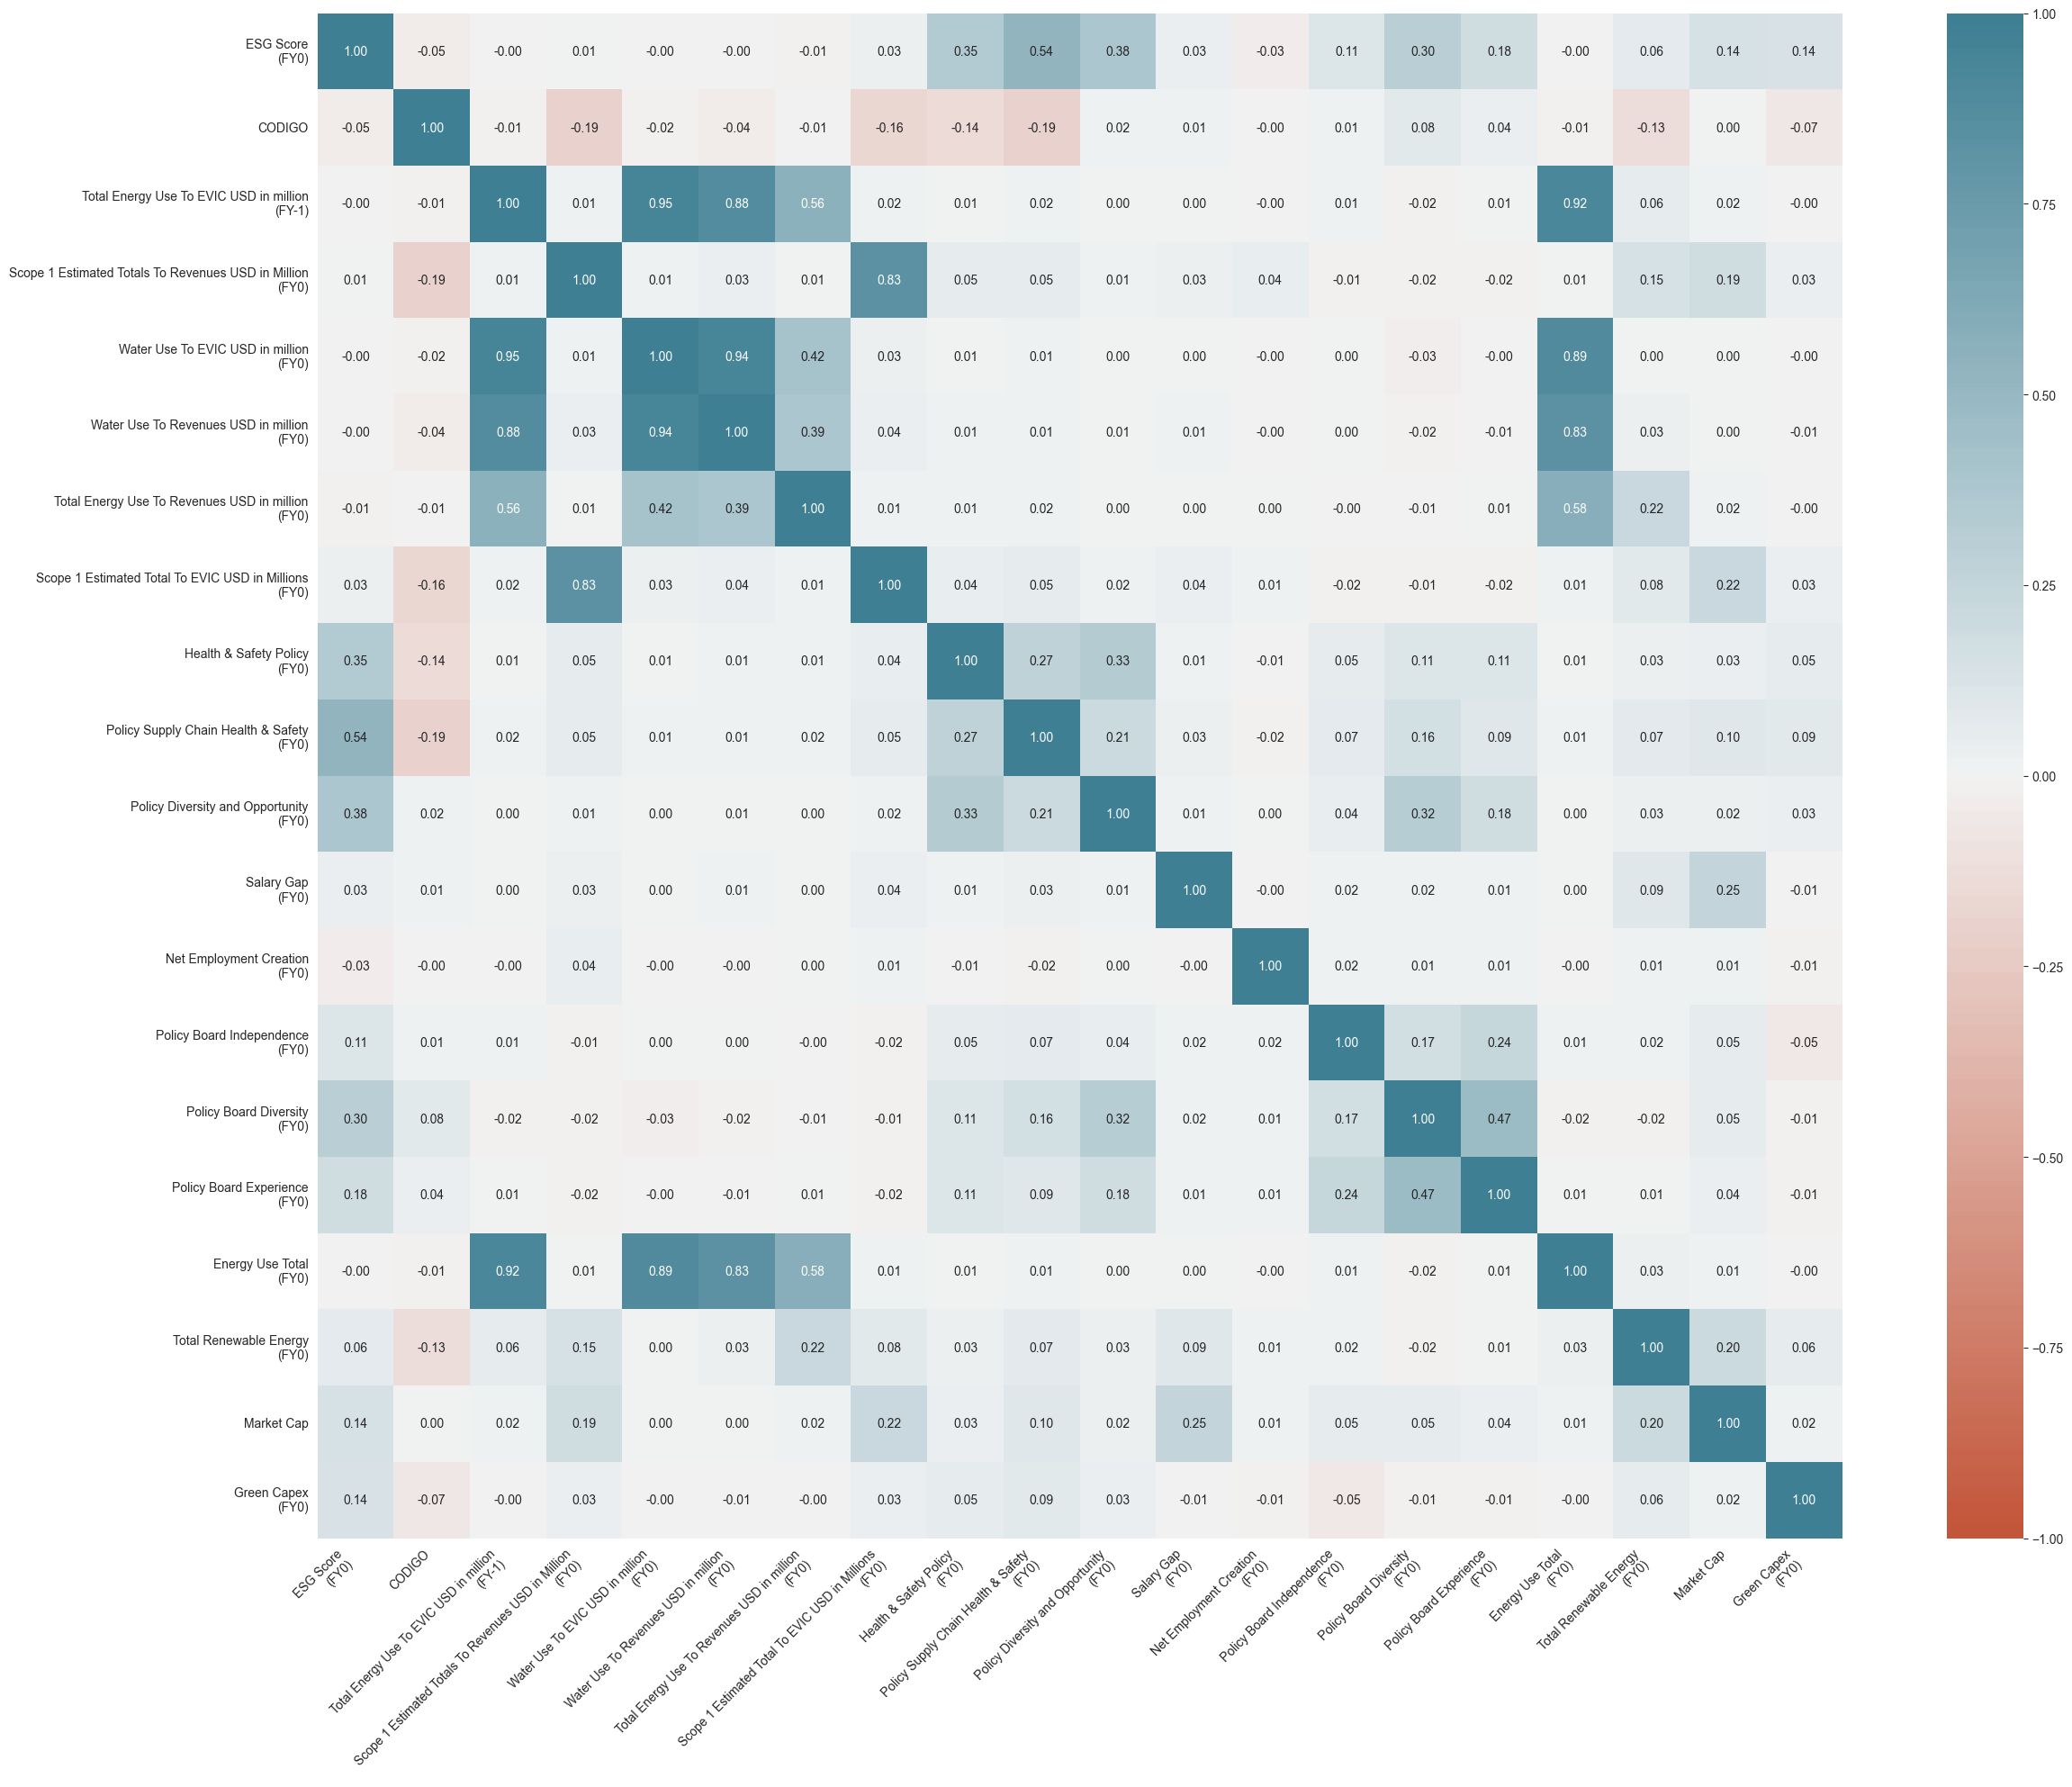

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

cor_map = dataset.corr(method='pearson')
plt.figure(figsize=(30, 22))
ax = sns.heatmap(
    cor_map,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True, fmt=".2f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [249]:
esg_score = dataset['ESG Score\n(FY0)']
dataset = dataset.drop(columns=['Energy Use Total\n(FY0)', 'Total Energy Use To EVIC USD in million\n(FY-1)', 'Water Use To EVIC USD in million\n(FY0)', 'Scope 1 Estimated Total To EVIC USD in Millions\n(FY0)', 'ESG Score\n(FY0)'])

In [250]:
dataset

,CODIGO,Scope 1 Estimated Totals To Revenues USD in Million\n(FY0),Water Use To Revenues USD in million\n(FY0),Total Energy Use To Revenues USD in million\n(FY0),Health & Safety Policy\n(FY0),Policy Supply Chain Health & Safety\n(FY0),Policy Diversity and Opportunity\n(FY0),Salary Gap\n(FY0),Net Employment Creation\n(FY0),Policy Board Independence\n(FY0),Policy Board Diversity\n(FY0),Policy Board Experience\n(FY0),Total Renewable Energy\n(FY0),Market Cap,Green Capex\n(FY0)
0,54,3.387115,1390.794881,282.336418,1.0,0.0,1.0,13.936185,-12.335994,1.0,0.0,1.0,3.850195e+05,7.549580e+09,0.0
1,52,0.030572,0.941106,0.867878,1.0,1.0,1.0,21.222907,2.991453,0.0,1.0,1.0,2.269090e+03,3.771649e+10,0.0
2,31,70.700283,1089.719244,861.374858,1.0,1.0,1.0,306.141919,-3.157895,1.0,1.0,1.0,5.796000e+06,5.654799e+10,0.0
3,54,0.483210,384.365615,22.626613,1.0,0.0,1.0,16.059680,17.641997,0.0,1.0,1.0,1.064055e+05,2.086432e+09,0.0
4,31,11.082928,1606.427900,408.326539,1.0,0.0,1.0,29.533849,3.016760,0.0,1.0,1.0,2.019156e+05,8.494973e+08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,31,8.430300,474.022531,243.081511,1.0,0.0,1.0,23.356040,-2.892149,1.0,1.0,1.0,2.025232e+06,8.520533e+09,0.0
8940,22,1236.991233,59430.663377,3517.045914,1.0,1.0,1.0,3.405826,11.462284,1.0,0.0,0.0,9.500260e+05,8.428824e+08,0.0
8943,48,258.197022,820.988930,3890.017508,1.0,0.0,1.0,141.567564,4.286612,1.0,1.0,1.0,7.560000e+04,1.709282e+10,0.0
8944,31,44.576014,730.385171,938.418421,1.0,1.0,1.0,218.253954,-3.019837,0.0,1.0,1.0,5.020410e+05,1.295149e+10,0.0


In [251]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train,x_test,y_train,y_test = train_test_split(dataset, esg_score, test_size=0.10, random_state=2)

In [ ]:
complete_dataset = pd.read_excel('BASE DE DATOS.xlsx')

In [396]:
x_test[x_test['CODIGO']==54].head(11)

,CODIGO,Scope 1 Estimated Totals To Revenues USD in Million\n(FY0),Water Use To Revenues USD in million\n(FY0),Total Energy Use To Revenues USD in million\n(FY0),Health & Safety Policy\n(FY0),Policy Supply Chain Health & Safety\n(FY0),Policy Diversity and Opportunity\n(FY0),Salary Gap\n(FY0),Net Employment Creation\n(FY0),Policy Board Independence\n(FY0),Policy Board Diversity\n(FY0),Policy Board Experience\n(FY0),Total Renewable Energy\n(FY0),Market Cap,Green Capex\n(FY0)
4627,54,4.983699,397.756274,80.745970,0.0,0.0,1.0,29.542590,23.298969,1.0,1.0,1.0,1.101125e+05,2.159120e+09,0.0
3118,54,4.983699,450.983456,91.551281,1.0,0.0,1.0,15.081980,-0.256410,1.0,1.0,1.0,1.248476e+05,2.448050e+09,0.0
4584,54,0.805612,363.882420,73.869454,0.0,0.0,1.0,12.169110,2.719033,1.0,1.0,1.0,1.007351e+05,1.975244e+09,0.0
4667,54,6.506291,190.927226,38.758921,1.0,0.0,1.0,6.385069,0.000000,1.0,1.0,1.0,5.285517e+04,1.036400e+09,0.0
2224,54,2.668156,44.362039,76.016740,1.0,0.0,1.0,14.466792,27.299367,1.0,1.0,1.0,3.868170e+04,5.517225e+09,1.0
4642,54,9.375163,1095.149597,222.319350,0.0,0.0,1.0,136.339687,16.717325,1.0,0.0,0.0,3.031748e+05,5.944744e+09,0.0
4150,54,0.655802,45.946290,68.259398,1.0,1.0,1.0,31.383552,21.390374,1.0,1.0,1.0,3.005530e+03,5.094060e+09,0.0
2952,54,3.409374,2774.413798,563.216088,1.0,1.0,1.0,586.842385,27.065192,1.0,1.0,1.0,4.967820e+04,1.506021e+10,0.0
959,54,1.373972,6776.805551,1375.716166,1.0,0.0,1.0,226.632799,-6.739726,1.0,1.0,1.0,1.876051e+06,3.678618e+10,0.0
7920,54,0.293606,8.993134,24.163635,1.0,1.0,1.0,13.770490,-1.578947,1.0,1.0,1.0,7.819366e+04,1.533245e+09,0.0


In [403]:
complete_dataset

,Identifier (RIC),Company Name,ESG Score\n(FY0),NAICS Sector Name,CODIGO,TRBC Activity Name,Total Energy Use To EVIC USD in million\n(FY-1),Scope 1 Estimated Totals To Revenues USD in Million\n(FY0),Water Use To EVIC USD in million\n(FY0),Water Use To Revenues USD in million\n(FY0),...,Median Salary Gap\n(FY0),Policy Board Independence\n(FY0),Policy Board Diversity\n(FY0),Policy Board Experience\n(FY0),Energy Use Total\n(FY0),Total Renewable Energy\n(FY0),Market Cap,Renewable Energy Use Ratio\n(FY0),Green Capex\n(FY0),Deforestation Controversies Count\n(FY0)
0,601360.SS,360 Security Technology Inc,35.338294,"Professional, Scientific, and Technical Services",54,Online Services (NEC),NaN,3.387115,NaN,NaN,...,NaN,1.0,0.0,1.0,NaN,NaN,7.549580e+09,NaN,0.0,NaN
1,III.L,3i Group PLC,71.365640,Finance and Insurance,52,Investment Management & Fund Operators (NEC),0.256986,0.030572,0.261598,0.941106,...,NaN,0.0,1.0,1.0,5113.08,2269.09,3.771649e+10,0.443781,0.0,NaN
2,MMM.N,3M Co,90.715988,Manufacturing,31,Consumer Goods Conglomerates,252.974117,70.700283,452.901300,1089.719244,...,198.00,1.0,1.0,1.0,29484000.00,5796000.00,5.654799e+10,NaN,0.0,NaN
3,FOUR.L,4imprint Group PLC,56.751867,"Professional, Scientific, and Technical Services",54,Direct Marketing,23.602290,0.483210,NaN,NaN,...,NaN,0.0,1.0,1.0,25800.90,NaN,2.086432e+09,NaN,0.0,NaN
4,BAG.L,A G Barr PLC,42.648572,Manufacturing,31,Carbonated Soft Drinks,220.403038,11.082928,NaN,NaN,...,NaN,0.0,1.0,1.0,160770.00,NaN,8.494973e+08,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,0763.HK,ZTE Corp,89.554445,Information,51,Communications & Networking (NEC),125.526738,2.416762,216.917863,304.450627,...,NaN,1.0,1.0,1.0,7256580.00,9680.85,1.717045e+10,NaN,0.0,NaN
8942,ZTO.N,ZTO Express (Cayman) Inc,60.136578,Transportation and Warehousing,48,Courier Services,825.543888,258.197022,175.613459,820.988930,...,NaN,1.0,1.0,1.0,19952600.00,75600.00,1.709282e+10,NaN,0.0,NaN
8943,2057.HK,ZTO Express (Cayman) Inc,60.136578,Transportation and Warehousing,48,Courier Services,825.543888,258.197022,175.613459,820.988930,...,NaN,1.0,1.0,1.0,19952600.00,75600.00,1.709282e+10,NaN,0.0,NaN
8944,ZYDU.BO,Zydus Lifesciences Ltd,67.363008,Manufacturing,31,Generic Pharmaceuticals,354.781048,44.576014,236.999494,730.385171,...,NaN,0.0,1.0,1.0,1968830.00,502041.00,1.295149e+10,0.254995,0.0,NaN


In [252]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
xdf = x_train
y_df = esg_score

x_df = StandardScaler().fit_transform(xdf)
pca = PCA(0.8)
principal_components = pca.fit_transform(x_df)
print("the size of the new data with the principal components is:",principal_components.shape)
principal_df = pd.DataFrame(data = principal_components)
print("the size of the new data frame with the principal components is:",principal_df.shape)

#principal components
#print("The principal components are:")
#print(pca.components)
print("\nthe explained variance ratio is:",pca.explained_variance_ratio_)

total_variance = np.sum(pca.explained_variance_ratio_)
print("\nthe total variance is:", total_variance)

the size of the new data with the principal components is: (6398, 11)
the size of the new data frame with the principal components is: (6398, 11)

the explained variance ratio is: [0.13449253 0.10990465 0.09152197 0.08703511 0.07169306 0.0662219
 0.06538449 0.06077312 0.05740132 0.05325591 0.0501011 ]

the total variance is: 0.8477851646712268


In [262]:
principal_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.164927,-0.801310,0.539527,0.270984,0.084061,-0.013664,-0.131357,0.265820,0.106397,0.356944,-0.810194
1,0.920645,-0.512013,0.161889,0.086428,-0.298740,-0.053340,-0.351579,-0.367439,0.169540,0.114105,0.507735
2,1.068456,-0.010902,-0.167857,-0.242436,0.392996,-0.128707,-0.445103,-0.540156,0.143908,-0.309293,0.482567
3,0.354240,-0.106132,0.098531,0.166426,0.751091,-0.217201,-0.362234,0.526582,-0.277097,0.104065,-1.086599
4,1.512020,0.930541,-1.014529,-0.167984,-0.521255,-1.238716,2.562629,-1.110180,-0.753923,0.512708,0.342456
...,...,...,...,...,...,...,...,...,...,...,...
6393,-2.094239,0.758415,-0.175976,0.265604,1.079276,-0.807406,-0.011509,0.280269,-0.576820,-2.249610,-0.248524
6394,0.095436,-1.062758,0.767902,0.464023,-0.202822,0.173592,0.002302,0.379819,0.150443,0.698098,-0.632415
6395,-2.827186,0.699524,0.099744,0.598880,1.651319,-1.226073,-0.532451,-1.502434,0.092766,-0.025304,-0.528045
6396,0.990881,-0.178539,-0.214058,-0.429446,0.355634,-0.341138,-0.503926,-0.476538,0.148726,-0.370810,0.340093


# Gradient Boosting Regressor 

In [266]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
gbr = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters from GridSearchCV: {best_params}")


In [269]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor

best_gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42)
best_gbr.fit(X_train_scaled, y_train)

y_pred_train = best_gbr.predict(X_train_scaled)
y_pred_test = best_gbr.predict(X_test_scaled)

# Calculate metrics
def print_metrics(y_true, y_pred, dataset_type=""):
    rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    print(f"{dataset_type} RMSLE: {rmsle}")
    print(f"{dataset_type} MAE: {mae}")
    print(f"{dataset_type} MSE: {mse}")
    print(f"{dataset_type} MAPE: {mape}")

print_metrics(y_test, y_pred_test, "Test")


Test RMSLE: 0.2866715278020011
Test MAE: 10.243449247908917
Test MSE: 160.62082515901153
Test MAPE: 0.2476119763805004


# Support Vector Regression

In [263]:
from sklearn.svm import SVR

dt = SVR()
dt_params = {'C': np.arange(1, 20), 'epsilon': np.arange(0.01, 1, 0.01), 'kernel': ['linear', 'rbf']}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params, cv=3)
gs_dt.fit(principal_df, y_train)
a = gs_dt.best_params_
a

{'C': np.int64(19), 'epsilon': np.float64(0.99), 'kernel': 'rbf'}

In [264]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

dtr = make_pipeline(StandardScaler(), PCA(n_components=11), SVR(**a))
model = dtr.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [265]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree

print('MAE:',mean_absolute_error(y_pred,y_test))
print('MSE:',mean_squared_error(y_pred,y_test))
print('MAPE', mean_absolute_percentage_error(y_pred, y_test))

RMLSE for the data: 0.30989482311595673
MAE: 11.26066218971991
MSE: 198.16978008955635
MAPE 0.2234379859991297


# Random Forest

In [178]:
from sklearn.ensemble import RandomForestRegressor

dt = RandomForestRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,20),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params, cv=3)
gs_dt.fit(principal_df, y_train)
a = gs_dt.best_params_
a

{'max_depth': np.int64(10), 'min_samples_leaf': np.int64(2)}

In [372]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

dtr = make_pipeline(StandardScaler(), PCA(n_components=11), RandomForestRegressor(max_depth=10, min_samples_leaf=2, random_state=0))
model = dtr.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [373]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree

print('MAE:',mean_absolute_error(y_pred,y_test))
print('MSE:',mean_squared_error(y_pred,y_test))
print('MAPE', mean_absolute_percentage_error(y_pred, y_test))

RMLSE for the data: 0.3032005241638322
MAE: 10.95300822384886
MSE: 187.65560969978347
MAPE 0.21661195483530343


In [274]:
for i, val in enumerate(y_test.tolist()):
    print("Predicted: ", y_pred[i], ", Real: ", val)

Predicted:  27.128870004170007 , Real:  49.0078071433283
Predicted:  57.58384183521723 , Real:  27.5062125151798
Predicted:  74.17396604490895 , Real:  61.1870686934762
Predicted:  53.33278065719736 , Real:  34.9097785033131
Predicted:  45.89986766073756 , Real:  41.1654559960098
Predicted:  61.941561529863556 , Real:  42.1342916080329
Predicted:  65.19360941566958 , Real:  68.6136160209074
Predicted:  47.88692936607752 , Real:  46.0949950265533
Predicted:  68.40459897251752 , Real:  66.6568080264634
Predicted:  57.29171104817708 , Real:  48.950756875929
Predicted:  69.58976578876452 , Real:  70.6288402201724
Predicted:  38.952551531114956 , Real:  30.0251441881465
Predicted:  59.73652262160291 , Real:  68.2654731942371
Predicted:  61.811832099203066 , Real:  54.3113151805027
Predicted:  25.87691440980349 , Real:  27.2939382139133
Predicted:  45.70467118793987 , Real:  59.3044014604656
Predicted:  41.220961695985004 , Real:  52.0564574581628
Predicted:  70.54918578272618 , Real:  68.33

# Modelo para la caracteristicas importantes

In [399]:
dataset.shape

(7109, 15)

In [375]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
best_rf = RandomForestRegressor(max_depth=10, min_samples_leaf=2, random_state=0)
best_rf.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=2, random_state=0)

In [376]:
# Feature importances
importances = best_rf.feature_importances_
feature_names = dataset.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)


                                                       feature  importance
5                   Policy Supply Chain Health & Safety\n(FY0)    0.409773
13                                                  Market Cap    0.163322
6                      Policy Diversity and Opportunity\n(FY0)    0.103495
2                  Water Use To Revenues USD in million\n(FY0)    0.049970
7                                            Salary Gap\n(FY0)    0.046360
1   Scope 1 Estimated Totals To Revenues USD in Million\n(FY0)    0.043618
3           Total Energy Use To Revenues USD in million\n(FY0)    0.041415
8                               Net Employment Creation\n(FY0)    0.037242
12                               Total Renewable Energy\n(FY0)    0.031575
4                                Health & Safety Policy\n(FY0)    0.026072
10                               Policy Board Diversity\n(FY0)    0.019360
0                                                       CODIGO    0.015698
11                       

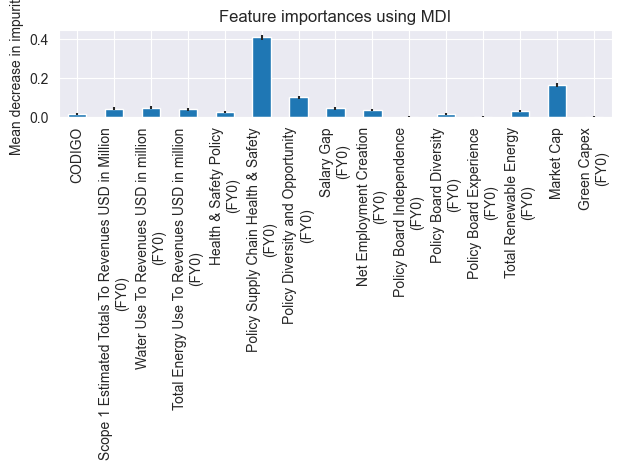

In [377]:
importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=dataset.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [378]:
new_data_df = pd.DataFrame(x_test.iloc[2].to_numpy().reshape(1, -1))
new_data_df.columns = dataset.columns
new_data_df

,CODIGO,Scope 1 Estimated Totals To Revenues USD in Million\n(FY0),Water Use To Revenues USD in million\n(FY0),Total Energy Use To Revenues USD in million\n(FY0),Health & Safety Policy\n(FY0),Policy Supply Chain Health & Safety\n(FY0),Policy Diversity and Opportunity\n(FY0),Salary Gap\n(FY0),Net Employment Creation\n(FY0),Policy Board Independence\n(FY0),Policy Board Diversity\n(FY0),Policy Board Experience\n(FY0),Total Renewable Energy\n(FY0),Market Cap,Green Capex\n(FY0)
0,31.0,28.837805,5827.219496,5066.013744,1.0,1.0,1.0,7529.922273,10.526316,1.0,1.0,1.0,732436.610421,3.081500e+09,0.0


In [379]:
best_rf.predict(new_data_df)

C:\Users\jrtta\OneDrive\Escritorio\proyectos personales\python\hackatonBCPBackend\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([57.96397619])

In [380]:
y_test.iloc[2]

np.float64(61.1870686934762)

In [404]:
X_test_scaled

array([[ 1.07848519, -0.21816217, -0.04319348, ..., -0.12429765,
        -0.15463504, -0.29367989],
       [ 0.84658641, -0.21880427, -0.04379725, ..., -0.12134944,
        -0.14838782, -0.29367989],
       [-0.69940547, -0.19210432, -0.03327847, ..., -0.10604755,
        -0.14515474, -0.29367989],
       ...,
       [ 0.15089006, -0.18977816, -0.04087286, ..., -0.11894411,
        -0.16282734, -0.29367989],
       [ 1.00118559, -0.21965674, -0.04144689, ..., -0.1261215 ,
        -0.16916767, -0.29367989],
       [ 0.923886  , -0.22205628, -0.04391305, ..., -0.1208382 ,
        -0.14529371, -0.29367989]])

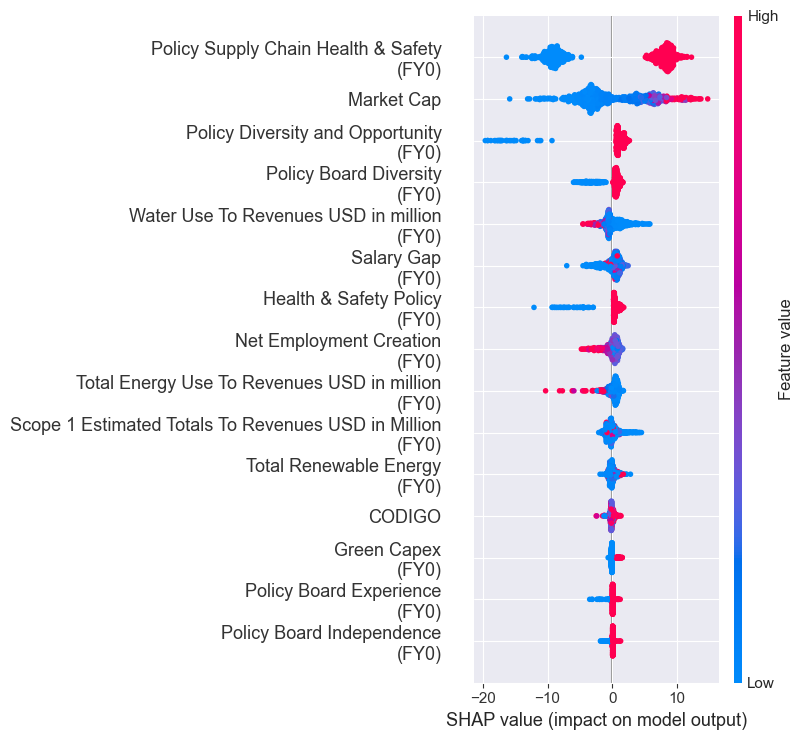

In [381]:
import shap



# Apply the same scaling
new_data_scaled = scaler.transform(new_data_df)

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_rf)

shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=dataset.columns)

# Generate SHAP values for the new data
new_shap_values = explainer.shap_values(new_data_scaled)

# Visualize the SHAP values for the new data point
shap.initjs()
shap.force_plot(explainer.expected_value, new_shap_values[0], new_data_scaled[0], feature_names=feature_names)
# Summary plot for the entire dataset


In [382]:
import joblib

joblib.dump(scaler, "scaler.model")

['scaler.model']

In [374]:
joblib.dump(best_rf, "features_importance.model")
joblib.dump(model, "random_forest.model")

['random_forest.model']

In [369]:
explainer.expected_value

In [315]:
from sklearn.tree import export_text

# Get a single tree from the forest
tree = best_rf.estimators_[0]

# Print the decision path for a specific sample
decision_path = tree.decision_path(X_test_scaled[0].reshape(1, -1))
decision_rules = export_text(tree, feature_names=list(feature_names))

print(f"Decision rules for sample {0}:\n{decision_rules}")


Decision rules for sample 0:
|--- Policy Supply Chain Health & Safety
(FY0) <= -0.04
|   |--- Policy Diversity and Opportunity
(FY0) <= -1.91
|   |   |--- Policy Board Experience
(FY0) <= -1.58
|   |   |   |--- Health & Safety Policy
(FY0) <= -1.84
|   |   |   |   |--- Salary Gap
(FY0) <= -0.05
|   |   |   |   |   |--- Market Cap <= -0.15
|   |   |   |   |   |   |--- Net Employment Creation
(FY0) <= -0.14
|   |   |   |   |   |   |   |--- Scope 1 Estimated Totals To Revenues USD in Million
(FY0) <= -0.22
|   |   |   |   |   |   |   |   |--- value: [14.94]
|   |   |   |   |   |   |   |--- Scope 1 Estimated Totals To Revenues USD in Million
(FY0) >  -0.22
|   |   |   |   |   |   |   |   |--- value: [13.76]
|   |   |   |   |   |   |--- Net Employment Creation
(FY0) >  -0.14
|   |   |   |   |   |   |   |--- Total Energy Use To Revenues USD in million
(FY0) <= -0.04
|   |   |   |   |   |   |   |   |--- Total Renewable Energy
(FY0) <= -0.13
|   |   |   |   |   |   |   |   |   |--- value: [8.7

In [316]:
best_rf.predict(pd.DataFrame(X_test_scaled[0].reshape(1, -1)))

array([26.10759939])

In [317]:
y_test.iloc[0]

np.float64(49.0078071433283)